## Ref 

- https://www.kaggle.com/c/bike-sharing-demand

- https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

## Columns :
> - datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + 
         Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [1]:
# load basics library 

import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import pylab as pl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load CSVs

df_train = pd.read_csv('~/Kaggle.com_mini_project/bike_sharing/train.csv')
df_test = pd.read_csv('~/Kaggle.com_mini_project/bike_sharing/test.csv')
sampleSubmission = pd.read_csv('~/Kaggle.com_mini_project/bike_sharing/samplesubmit.csv')

In [9]:
df_train.shape

(10886, 12)

In [4]:
df_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


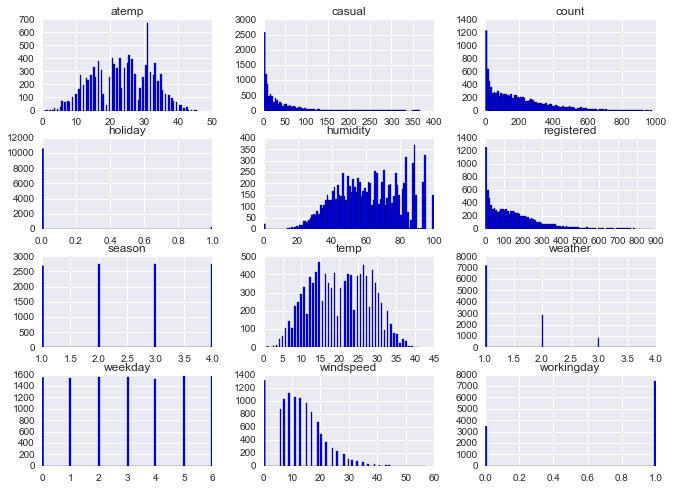

In [98]:
# histagram on train data 

df_train.hist(bins=100, figsize=(11,8),color='blue')
plt.show()

## 0) Check Data Quality 

In [15]:
#df_train.info()

In [12]:
df_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [24]:
#df_train.groupby(['casual']).count().sort()['datetime'].plot()

In [23]:
#df_train.temp.value_counts()

## 1) Feature Extract

In [99]:
#df_train.head(3)

In [96]:
# help functions 

def get_date(x):
    return x.split(" ")[0]

def get_year(x):
    return x.split(" ")[0].split("-")[0]

def get_month(x):
    return x.split(" ")[0].split("-")[1]

def get_weekday(x):
    # DatetimeIndex.weekday
    # The day of the week with Monday=0, Sunday=6
    # mon. = 0, tue.=1, wed.=2, thurs. = 3 , fri. = 4, sat. =5 , sun. = 6 
    return pd.to_datetime(x.split(" ")[0]).weekday()

def get_time(x):
    return x.split(" ")[1]

def get_hour(x):
    return x.split(" ")[1].split(":")[0]

#def get_season(x):
#    return x.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

In [94]:
# get features extracted

df_train['date'] = df_train['datetime'].apply(lambda x :get_date(x)  )
df_train['time'] = df_train['datetime'].apply(lambda x :get_time(x)  )
df_train['hour'] = df_train['datetime'].apply(lambda x :get_hour(x)  )
df_train['weekday'] = df_train['datetime'].apply(lambda x :get_weekday(x)  )
df_train['season_'] = df_train['season'].map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })


In [97]:
df_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,hour,weekday,season_
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,00,5,Spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,01,5,Spring
